<center>

# <font colour = 'red'> **Business Case Study - EDA for Shopping Dataset**</font></center>

---

## **Importing Dataset & Preprocessing of data as required**


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
shop = pd.read_csv("/content/drive/MyDrive/Projects/Domain Analytics/Exploratory Data Analysis/shopping.csv")

In [4]:
# Shape of the shop  -
print("No. of Rows : ", shop.shape[0])
print("No. of Columns : ", shop.shape[1])

No. of Rows :  12330
No. of Columns :  18


In [5]:
# Checking for duplicate rows -
print("No. of duplicate rows: ", shop.duplicated().sum())

No. of duplicate rows:  125


In [6]:
shop[shop.duplicated()]

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,False,False
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,False,False
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,True,False
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11934,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,2,New_Visitor,False,False
11938,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,4,1,Returning_Visitor,True,False
12159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,1,1,3,Returning_Visitor,False,False
12180,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Dec,1,13,9,20,Returning_Visitor,False,False


In [7]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [8]:
shop['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [9]:
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

shop['Month'] = pd.Categorical(shop['Month'], categories=month_order, ordered=True)

In [10]:
shop['SpecialDay'].unique()

array([0. , 0.4, 0.8, 1. , 0.2, 0.6])

In [11]:
# change column type to bool  ,'SpecialDay'
shop[['OperatingSystems', 'Browser', 'Region','TrafficType','VisitorType']] = shop[['OperatingSystems', 'Browser', 'Region','TrafficType','VisitorType']].astype('category')

In [12]:
shop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Administrative           12330 non-null  int64   
 1   Administrative_Duration  12330 non-null  float64 
 2   Informational            12330 non-null  int64   
 3   Informational_Duration   12330 non-null  float64 
 4   ProductRelated           12330 non-null  int64   
 5   ProductRelated_Duration  12330 non-null  float64 
 6   BounceRates              12330 non-null  float64 
 7   ExitRates                12330 non-null  float64 
 8   PageValues               12330 non-null  float64 
 9   SpecialDay               12330 non-null  float64 
 10  Month                    12042 non-null  category
 11  OperatingSystems         12330 non-null  category
 12  Browser                  12330 non-null  category
 13  Region                   12330 non-null  category
 14  Traffi

In [13]:
shop.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [14]:
shop.query('SpecialDay != 0').head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
6,0,0.0,0,0.0,1,0.000000,0.20000,0.200000,0.0,0.4,Feb,2,4,3,3,Returning_Visitor,False,False
8,0,0.0,0,0.0,2,37.000000,0.00000,0.100000,0.0,0.8,Feb,2,2,2,3,Returning_Visitor,False,False
9,0,0.0,0,0.0,3,738.000000,0.00000,0.022222,0.0,0.4,Feb,2,4,1,2,Returning_Visitor,False,False
11,0,0.0,0,0.0,16,407.750000,0.01875,0.025833,0.0,0.4,Feb,1,1,4,3,Returning_Visitor,False,False
20,0,0.0,0,0.0,8,136.166667,0.00000,0.008333,0.0,1.0,Feb,2,2,5,1,Returning_Visitor,True,False


In [15]:
shop['VisitorType'].nunique()

3

In [16]:
def missing_values(df):
    print("Missing Values")
    print("-"*15)
    missing = False
    for i in shop.columns:
      missing_count = shop[i].isna().sum()
      if missing_count > 0:
          print(f"{i} : {missing_count}")
          missing = True
    if not missing:
          print('No Missing Values in the DataFrame')

In [17]:
missing_values(shop)

Missing Values
---------------
Month : 288


## **EDA**

In [18]:
num_columns = shop.select_dtypes(include=['int64', 'float64']).columns
cat_columns = shop.select_dtypes(include=['category']).columns

In [19]:
num_columns

Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay'],
      dtype='object')

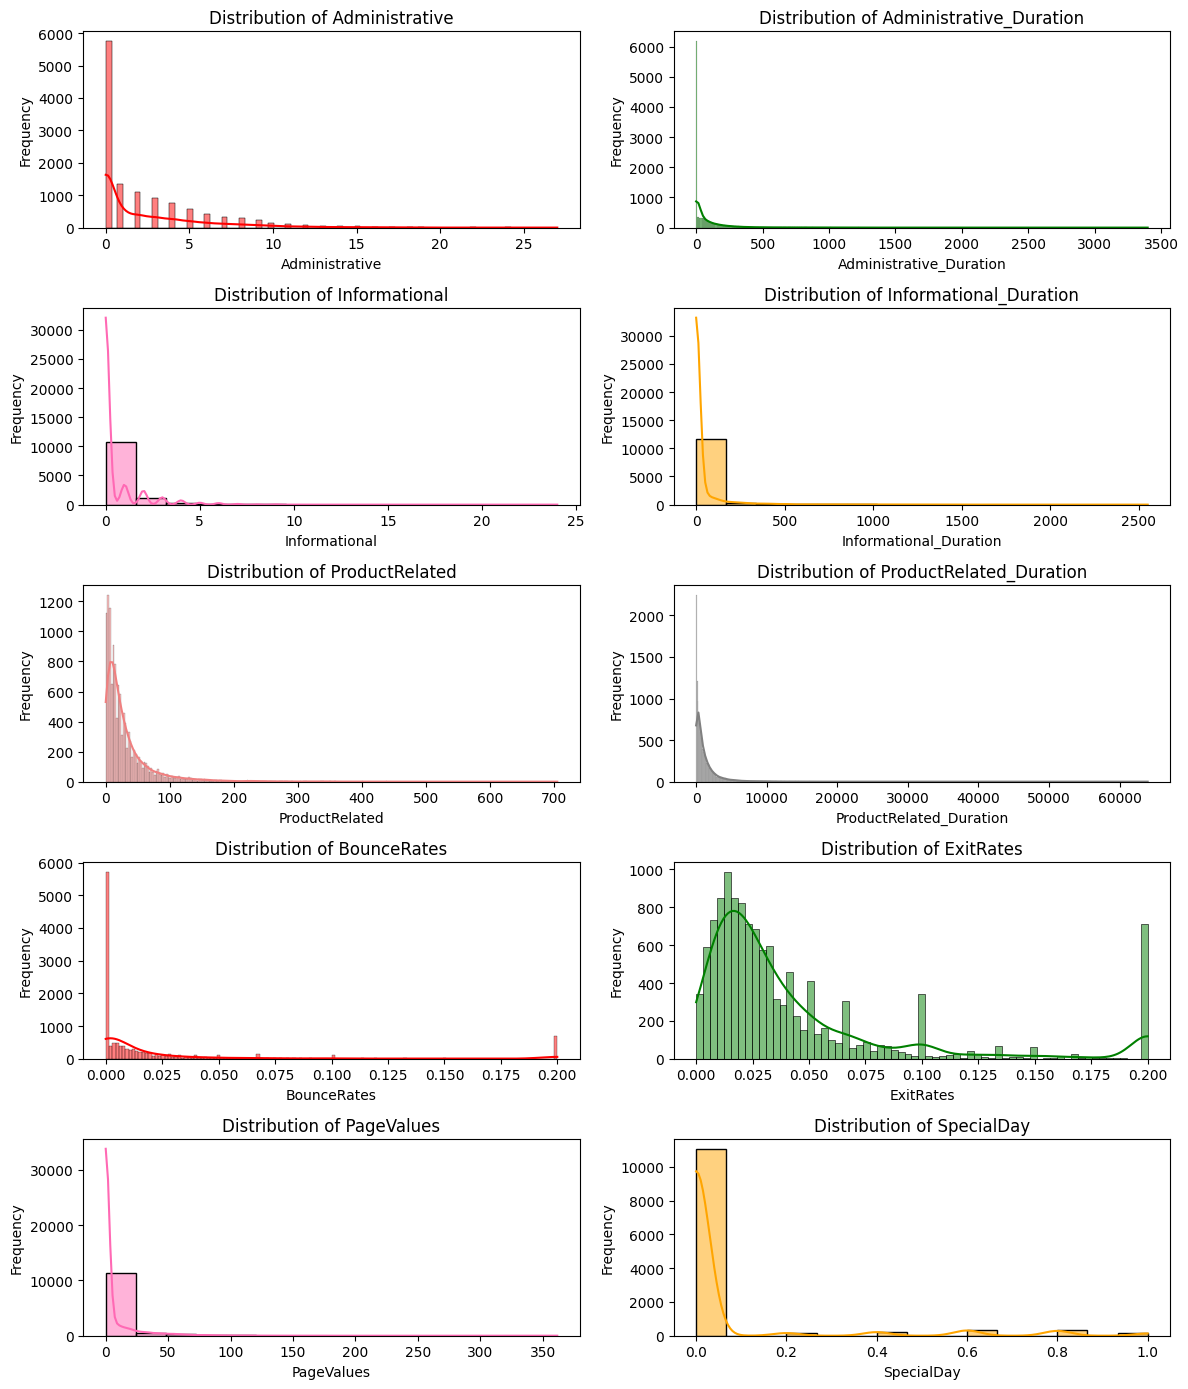

In [20]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 14))
color = ['red', 'green', 'hotpink', 'orange', 'lightcoral', 'grey','red', 'green', 'hotpink', 'orange']
counter = 0

for i in range(5):
    for j in range(2):
        sns.histplot(data=shop, x=num_columns[counter], kde=True, color=color[counter], ax=axes[i, j])
        axes[i, j].set_title(f"Distribution of {num_columns[counter]}")
        axes[i, j].set_xlabel(num_columns[counter])
        axes[i, j].set_ylabel("Frequency")
        counter += 1
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

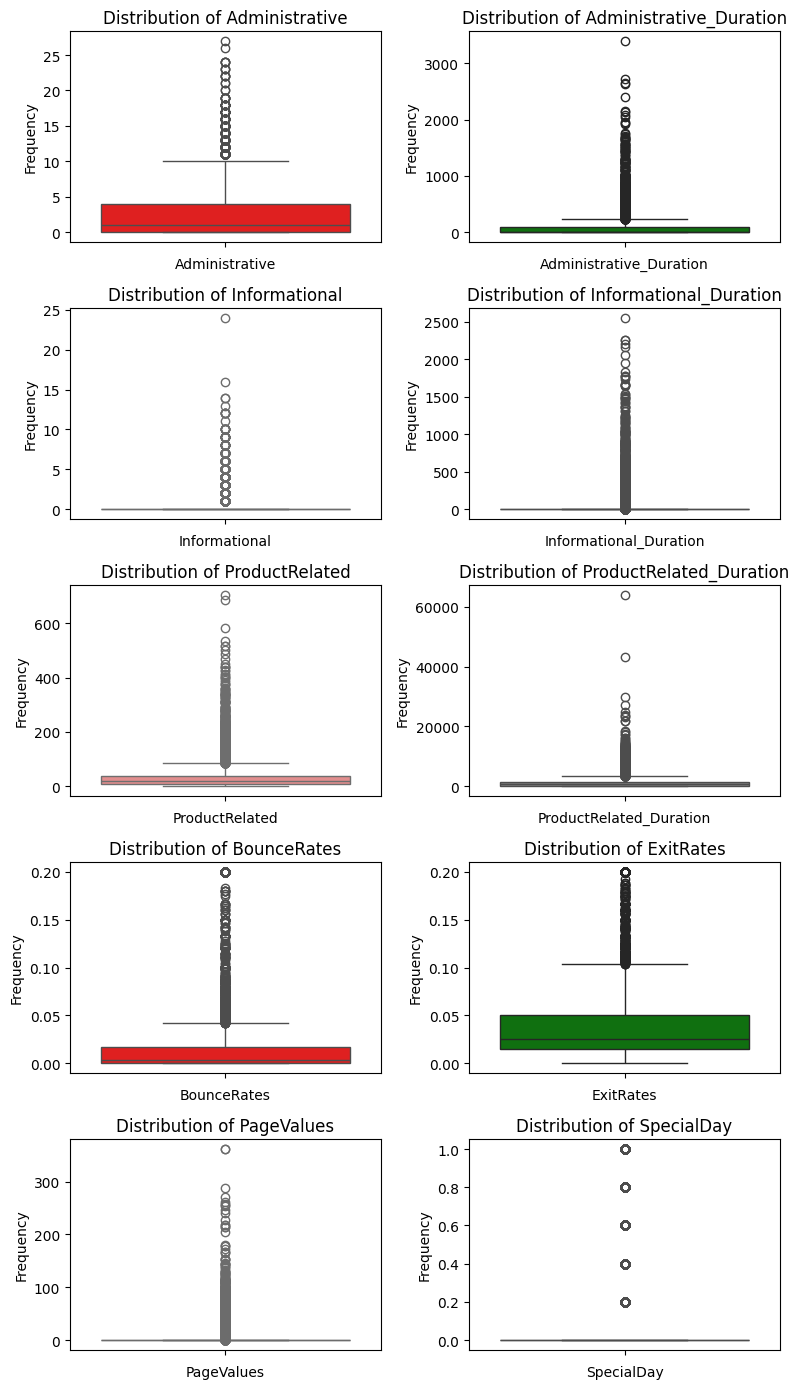

In [21]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(8, 14))
color = ['red', 'green', 'hotpink', 'orange', 'lightcoral', 'grey','red', 'green', 'hotpink', 'orange']
counter = 0

for i in range(5):
    for j in range(2):
        sns.boxplot(data=shop, y = num_columns[counter], color=color[counter], ax=axes[i, j])
        axes[i, j].set_title(f"Distribution of {num_columns[counter]}")
        axes[i, j].set_xlabel(num_columns[counter])
        axes[i, j].set_ylabel("Frequency")
        counter += 1
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

In [22]:
for col in num_columns:
    percentile_5 = np.percentile(shop[col], 5)
    percentile_95 = np.percentile(shop[col], 95)
    shop[col] = np.round(np.clip(shop[col], percentile_5, percentile_95),2)

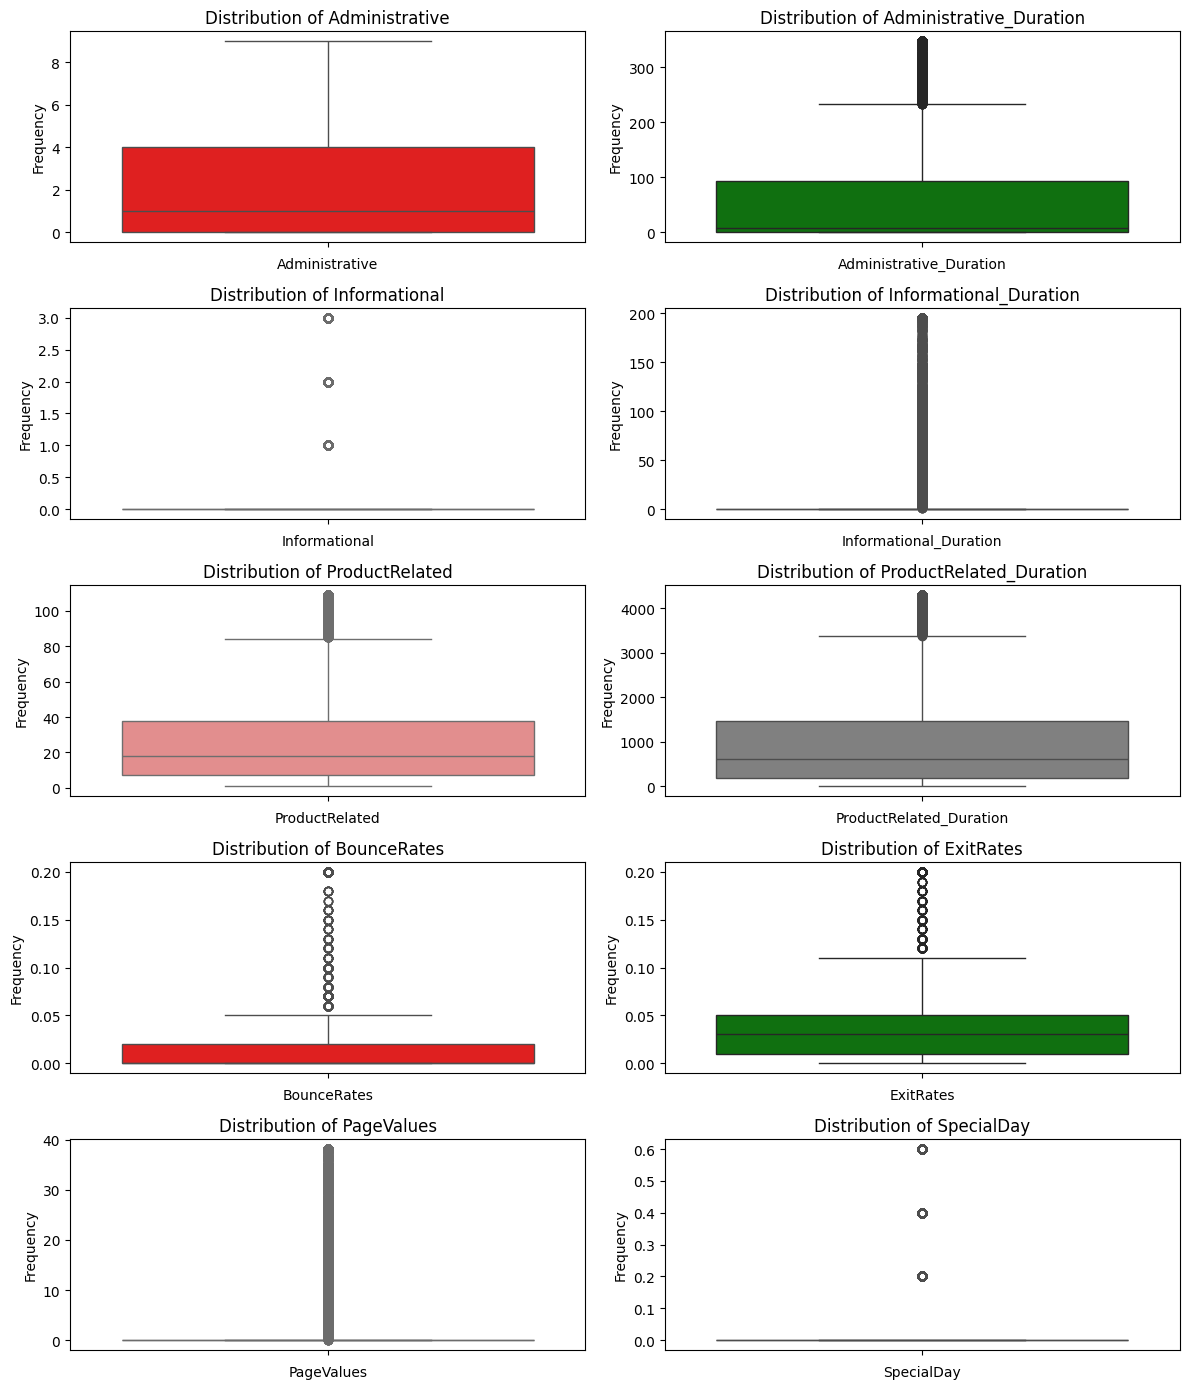

In [23]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12, 14))
color = ['red', 'green', 'hotpink', 'orange', 'lightcoral', 'grey','red', 'green', 'hotpink', 'orange']
counter = 0

for i in range(5):
    for j in range(2):
        sns.boxplot(data=shop, y = num_columns[counter], color=color[counter], ax=axes[i, j])
        axes[i, j].set_title(f"Distribution of {num_columns[counter]}")
        axes[i, j].set_xlabel(num_columns[counter])
        axes[i, j].set_ylabel("Frequency")
        counter += 1
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

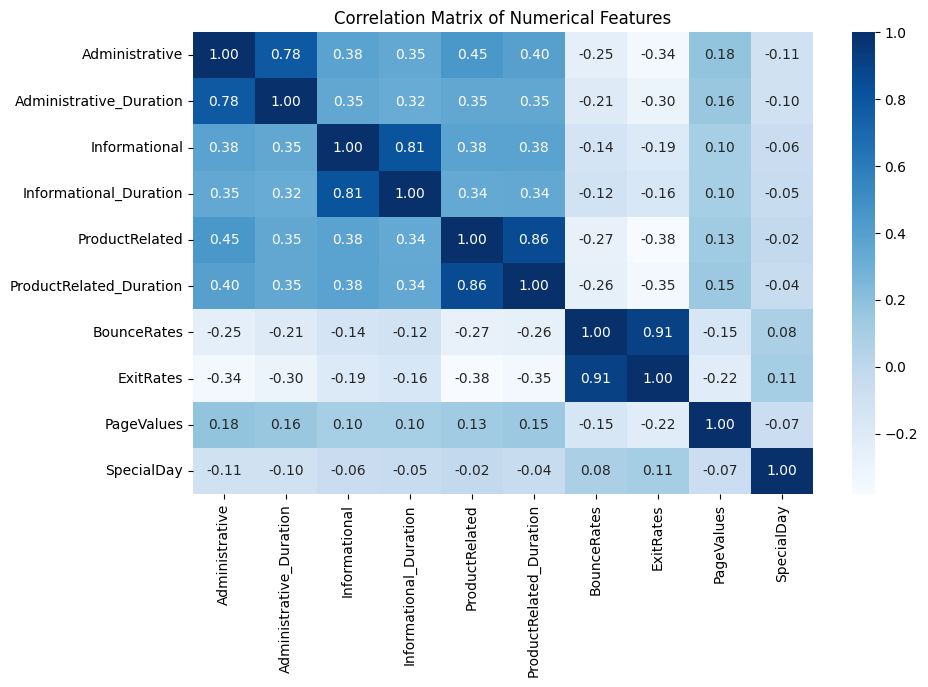

In [24]:
corr_matrix = shop[num_columns].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Blues', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

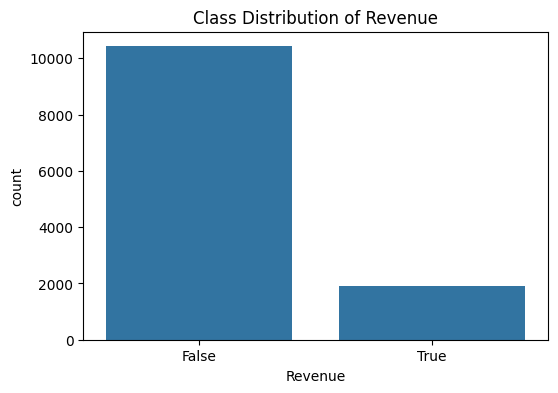

Revenue
False    84.525547
True     15.474453
Name: proportion, dtype: float64


In [25]:
# Plot class distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='Revenue', data=shop)
plt.title('Class Distribution of Revenue')
plt.show()

# Display class distribution percentages
class_distribution = shop['Revenue'].value_counts(normalize=True) * 100
print(class_distribution)

In [26]:
cat_columns

Index(['Month', 'OperatingSystems', 'Browser', 'Region', 'TrafficType',
       'VisitorType'],
      dtype='object')

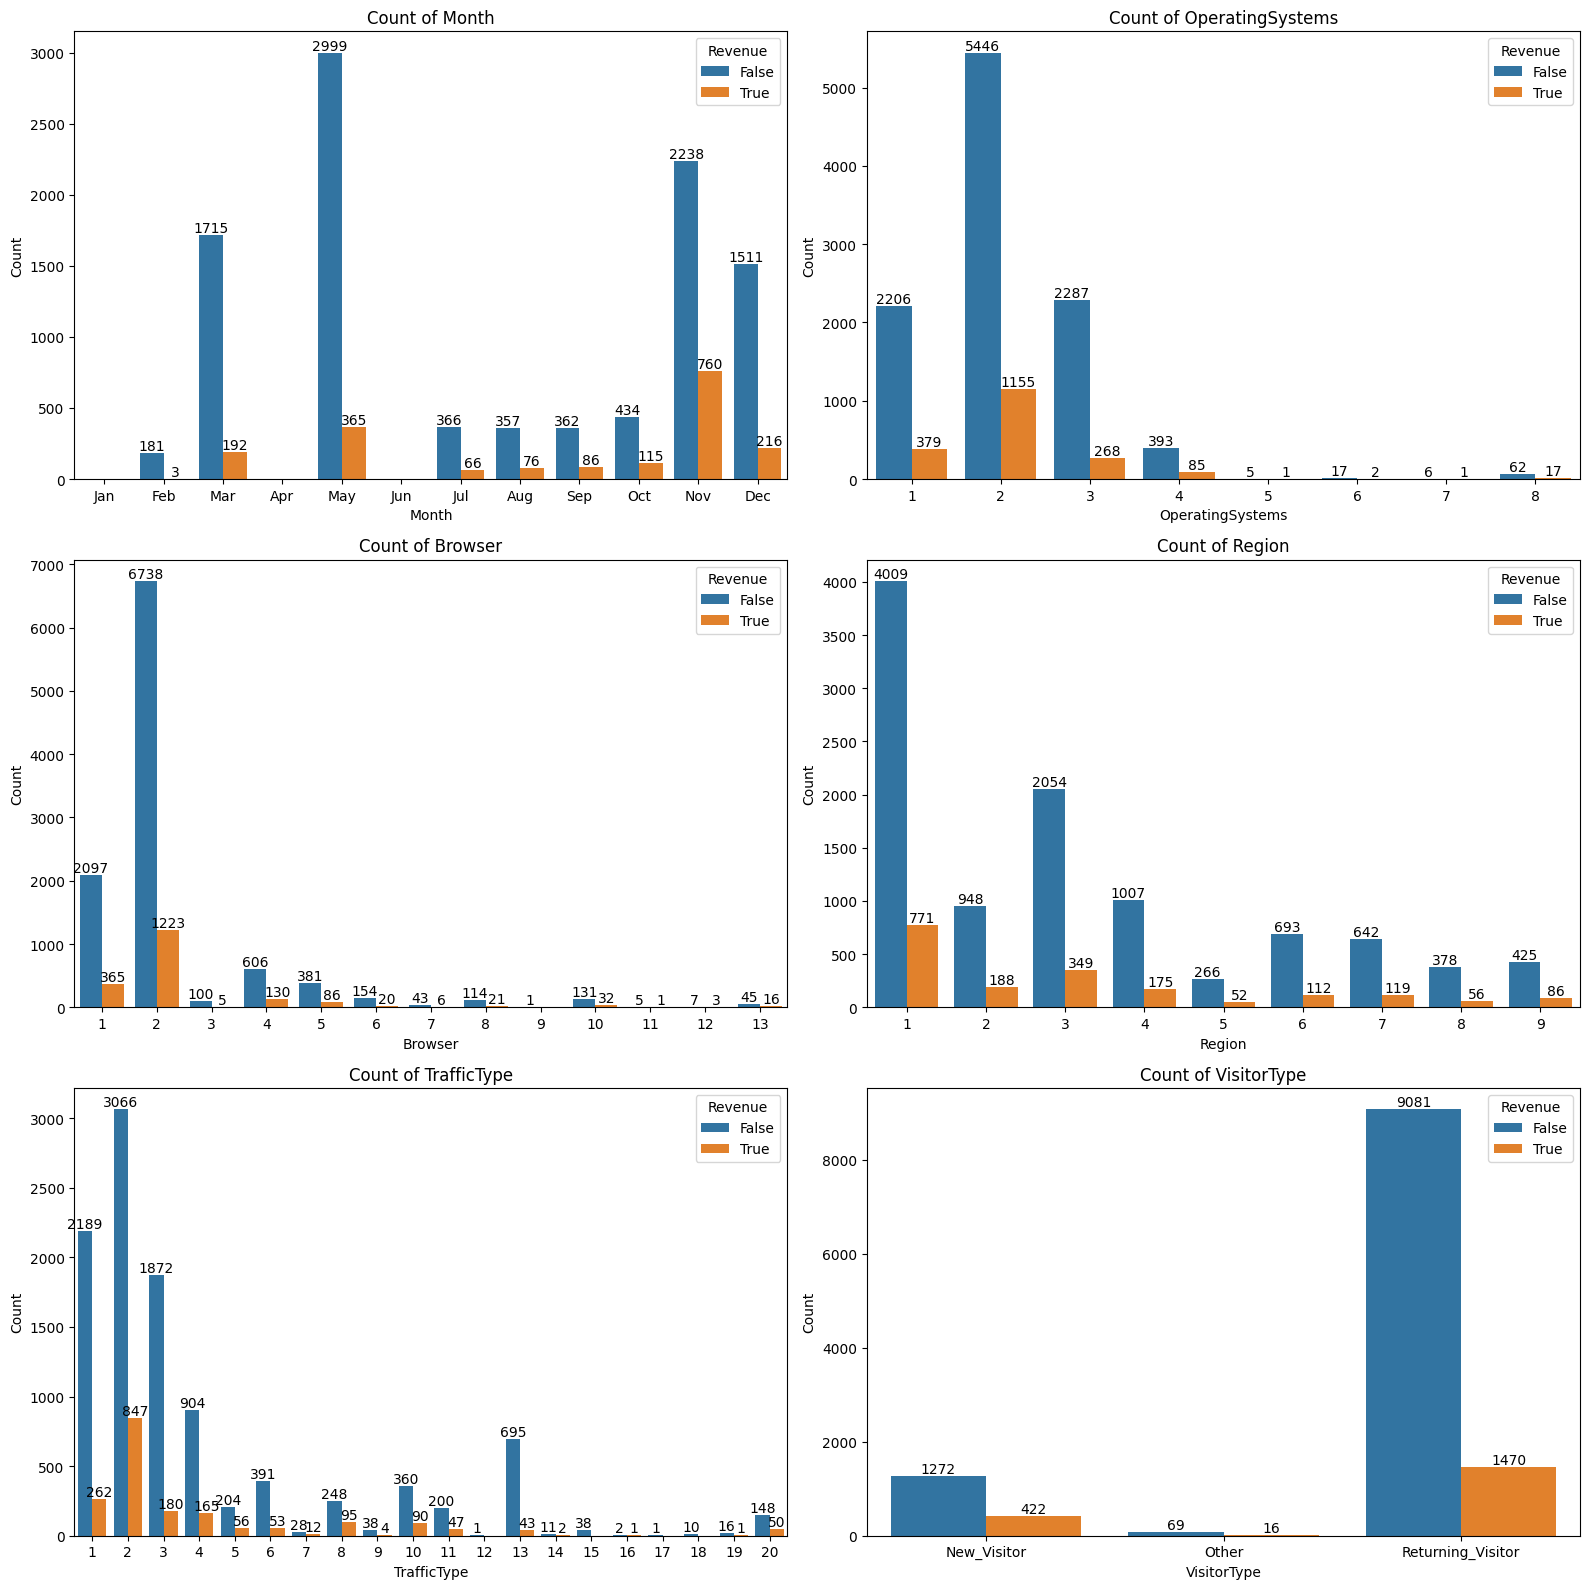

In [27]:
fig, axes = plt.subplots(nrows = 3, ncols = 2, figsize = (16,16))
#c = ['red', 'green', 'hotpink', 'orange' ,'lightcoral','grey']
plot_number = 0
k=0
for i in range(3):
  for j in range(2):
    sns.countplot(data = shop, x = cat_columns[plot_number],hue = shop['Revenue'], ax = axes[i,j])
    for p in axes[i,j].containers:
      axes[i,j].bar_label(p)
    axes[i,j].set_title(f"Count of {cat_columns[plot_number]}")
    axes[i,j].set_xlabel(cat_columns[plot_number])
    axes[i,j].set_ylabel('Count')
    plot_number += 1
    k += 1
plt.tight_layout()
plt.show()

In [28]:
for i in cat_columns:
  print(shop[i].value_counts(normalize = True)*100)
  print("\n")

Month
May    27.935559
Nov    24.896197
Mar    15.836240
Dec    14.341472
Oct     4.559043
Sep     3.720312
Aug     3.595748
Jul     3.587444
Feb     1.527985
Jan     0.000000
Apr     0.000000
Jun     0.000000
Name: proportion, dtype: float64


OperatingSystems
2    53.536091
1    20.965126
3    20.721817
4     3.876723
8     0.640714
6     0.154096
7     0.056772
5     0.048662
Name: proportion, dtype: float64


Browser
2     64.566099
1     19.967559
4      5.969181
5      3.787510
6      1.411192
10     1.321979
8      1.094891
3      0.851582
13     0.494728
7      0.397405
12     0.081103
11     0.048662
9      0.008110
Name: proportion, dtype: float64


Region
1    38.767234
3    19.489051
4     9.586375
2     9.213301
6     6.528792
7     6.171938
9     4.144363
8     3.519870
5     2.579075
Name: proportion, dtype: float64


TrafficType
2     31.735604
1     19.878345
3     16.642336
4      8.669911
13     5.985401
10     3.649635
6      3.600973
8      2.781833
5      2.108678

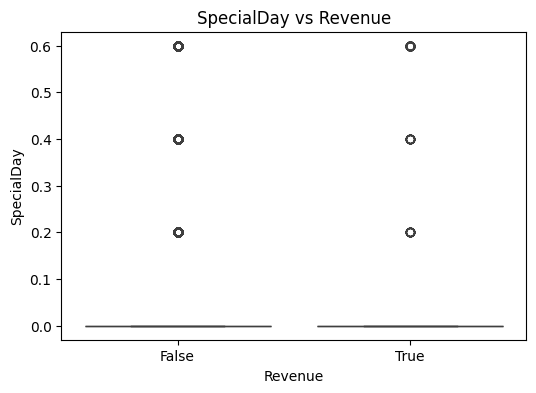

In [29]:
# SpecialDay vs Revenue
plt.figure(figsize=(6, 4))
sns.boxplot(x='Revenue', y='SpecialDay', data=shop)
plt.title('SpecialDay vs Revenue')
plt.show()

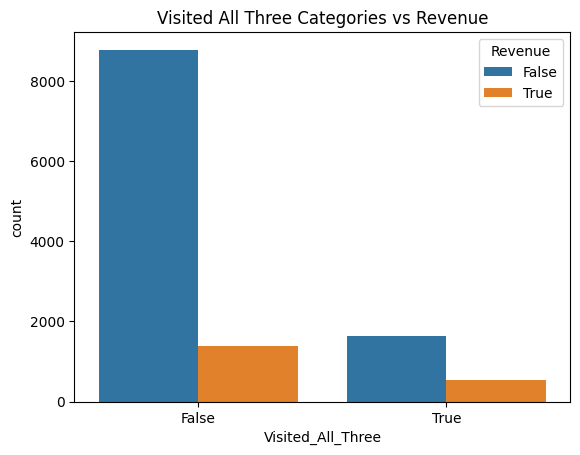

In [30]:
shop['Visited_All_Three'] = (shop['Administrative'] > 0) & (shop['Informational'] > 0) & (shop['ProductRelated'] > 0)

sns.countplot(x='Visited_All_Three', hue='Revenue', data=shop)
plt.title('Visited All Three Categories vs Revenue')
plt.show()

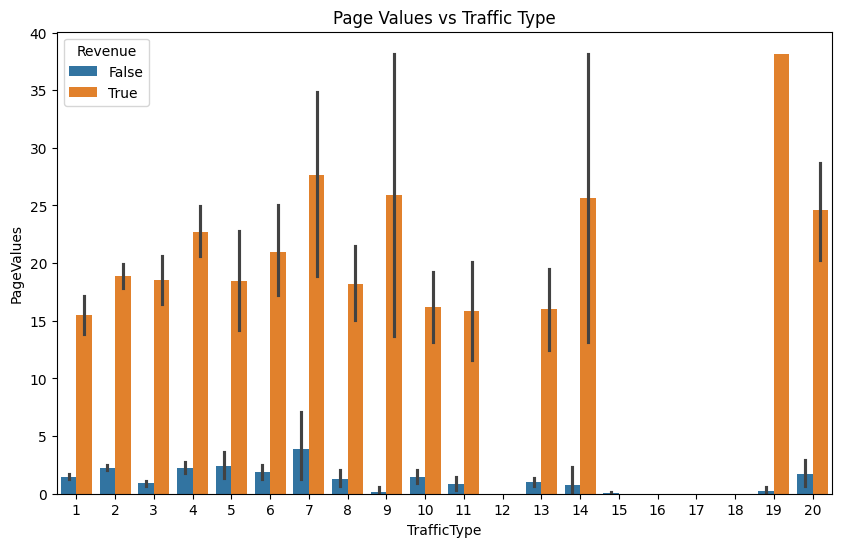

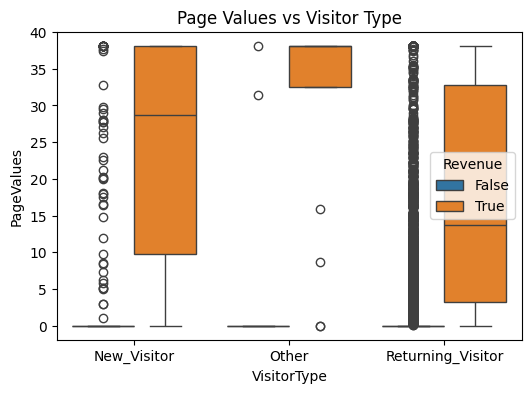

In [31]:
# PageValues vs TrafficType
plt.figure(figsize=(10, 6))
sns.barplot(x='TrafficType', y='PageValues', hue='Revenue', data=shop)
plt.title('Page Values vs Traffic Type')
plt.show()

# PageValues vs VisitorType
plt.figure(figsize=(6, 4))
sns.boxplot(x='VisitorType', y='PageValues', hue='Revenue', data=shop)
plt.title('Page Values vs Visitor Type')
plt.show()

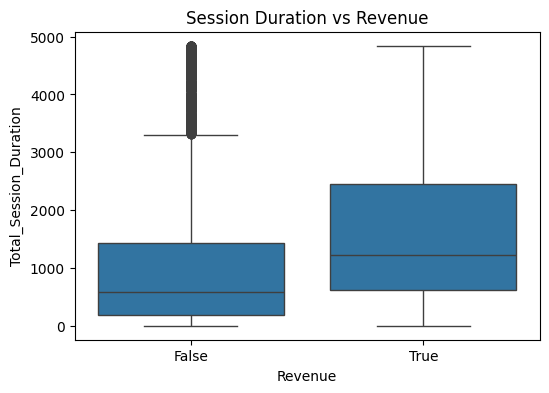

In [32]:
# Calculate session length
shop['Total_Session_Duration'] = shop['Administrative_Duration'] + shop['Informational_Duration'] + shop['ProductRelated_Duration']

# Plot session length vs Revenue
plt.figure(figsize=(6, 4))
sns.boxplot(x='Revenue', y='Total_Session_Duration', data=shop)
plt.title('Session Duration vs Revenue')
plt.show()

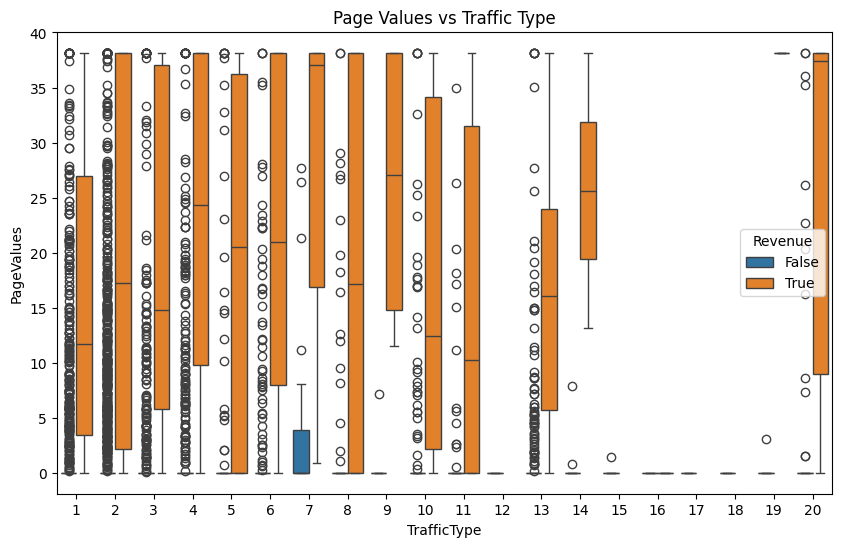

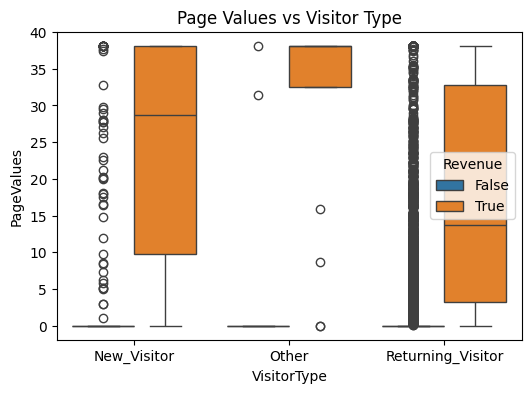

In [33]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='TrafficType', y='PageValues', hue='Revenue', data=shop)
plt.title('Page Values vs Traffic Type')
plt.show()

# PageValues vs VisitorType
plt.figure(figsize=(6, 4))
sns.boxplot(x='VisitorType', y='PageValues', hue='Revenue', data=shop)
plt.title('Page Values vs Visitor Type')
plt.show()